# First regular Machine Learning Model

Due to the nature and the size of the data, we decided to cut it in different notebooks to be able to process it in a better way without risking a crash in the system.

Here, after doing all the preprocessing and extracting de Mel Frequency Cepstral Coefficients (MFCCs), we're able to use classification models on our data, we'll apply two different models, while also doing hyper parameter tuning on them, to find the best model for our validation data, that we'll further on compare with the result on our Neural Network.

In [1]:
# Import the necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             auc, classification_report, confusion_matrix,
                             f1_score, precision_score, recall_score, roc_curve, RocCurveDisplay)
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                   train_test_split)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing our datasets. Is already divided into train, test, and validation.

train_df = pd.read_csv('train_mfcc.csv')
test_df = pd.read_csv('test_mfcc.csv')
valid_df = pd.read_csv('valid_mfcc.csv')

In [3]:
#Dividing into X and y, per our previous notebook we know that the column 'label' is our target variable.

X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

X_valid = valid_df.drop('label', axis=1)
y_valid = valid_df['label']

In [4]:
#Scaling the data for processing

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Running a simple Logistic Regression Model

In [5]:
baseline_model = LogisticRegression(random_state=420)
basel_mod_reg = baseline_model.fit(X_train_scaled,y_train)
y_hat_train = baseline_model.predict(X_train_scaled)
y_hat_valid = baseline_model.predict(X_valid_scaled)

### Evaluating results

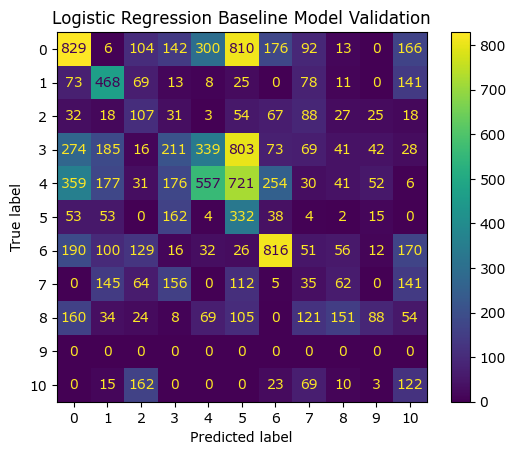

In [6]:
ConfusionMatrixDisplay.from_estimator(basel_mod_reg, X_valid_scaled, y_valid)
plt.title('Logistic Regression Baseline Model Validation');

In [7]:
print(classification_report(y_valid, y_hat_valid))

              precision    recall  f1-score   support

           0       0.42      0.31      0.36      2638
           1       0.39      0.53      0.45       886
           2       0.15      0.23      0.18       470
           3       0.23      0.10      0.14      2081
           4       0.42      0.23      0.30      2404
           5       0.11      0.50      0.18       663
           6       0.56      0.51      0.54      1598
           7       0.05      0.05      0.05       720
           8       0.36      0.19      0.25       814
           9       0.00      0.00      0.00         0
          10       0.14      0.30      0.20       404

    accuracy                           0.29     12678
   macro avg       0.26      0.27      0.24     12678
weighted avg       0.35      0.29      0.29     12678



As we can see, we have an accuracy of 0.29. Noting that the validation data doesn't have any of the label number 9.

Now, we're going to try two different models with Hyperparameter tuning.

Let's define the parameter grid for each one of them, and later on apply a grid search to find the best parameters.

### Finding best Parameters

In [8]:
#Parameter grid for Random Forest

param_grid_random_forest = {'n_estimators':[100,150],
                       'max_depth':[2,3,4,5],
                       'min_samples_leaf':[1,2,3]
                      }

#Parameter grid for Logistic Regression

param_grid_logistic_regression = {'penalty':['l1', 'l2', 'elasticnet', None],
                 'C':[0.01,0.1,1,10],
                 'solver':[ 'liblinear', 'sag', 'saga']
                }


In [9]:
# Applying GridSearchCV on different models to get the best set of hyperparameters for each one

gs_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=200,random_state=42), param_grid=param_grid_random_forest,scoring='accuracy',cv=5,error_score=0)
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=42,max_iter=10000), param_grid=param_grid_logistic_regression,scoring='accuracy',cv=5,error_score=0)

In [10]:
# Fitting the Random forest grid search and defining the best model.

gs_rf.fit(X_train_scaled,y_train)
best_random_forest = gs_rf.best_estimator_

In [11]:
# Fitting the Logistic Regression grid search and defining the best model.

gs_lr.fit(X_train_scaled,y_train)
best_logistic_regression = gs_lr.best_estimator_

In [12]:
# Defining Y hat for the validation data for the best Logistic Regression.

y_hat_lr = best_logistic_regression.predict(X_valid_scaled)
print(classification_report(y_valid, y_hat_lr))

              precision    recall  f1-score   support

           0       0.42      0.31      0.36      2638
           1       0.39      0.53      0.45       886
           2       0.15      0.23      0.18       470
           3       0.23      0.10      0.14      2081
           4       0.42      0.23      0.30      2404
           5       0.11      0.50      0.18       663
           6       0.56      0.51      0.54      1598
           7       0.05      0.05      0.05       720
           8       0.36      0.19      0.25       814
           9       0.00      0.00      0.00         0
          10       0.14      0.30      0.20       404

    accuracy                           0.29     12678
   macro avg       0.26      0.27      0.24     12678
weighted avg       0.35      0.29      0.29     12678



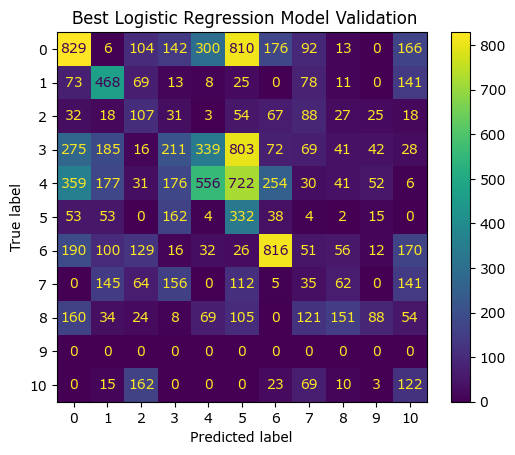

In [17]:
ConfusionMatrixDisplay.from_estimator(best_logistic_regression, X_valid_scaled, y_valid)
plt.title(' Best Logistic Regression Model Validation');

In [13]:
# Defining Y hat for the validation data for the best Random Forest.

y_hat_rf = best_random_forest.predict(X_valid_scaled)
print(classification_report(y_valid, y_hat_rf))

              precision    recall  f1-score   support

           0       0.48      0.17      0.25      2638
           1       0.55      0.52      0.54       886
           2       0.23      0.60      0.33       470
           3       0.43      0.01      0.02      2081
           4       0.34      0.25      0.29      2404
           5       0.12      0.78      0.21       663
           6       0.57      0.57      0.57      1598
           7       0.11      0.07      0.09       720
           8       0.45      0.56      0.50       814
           9       0.00      0.00      0.00         0
          10       0.39      0.45      0.42       404

    accuracy                           0.31     12678
   macro avg       0.33      0.36      0.29     12678
weighted avg       0.41      0.31      0.29     12678



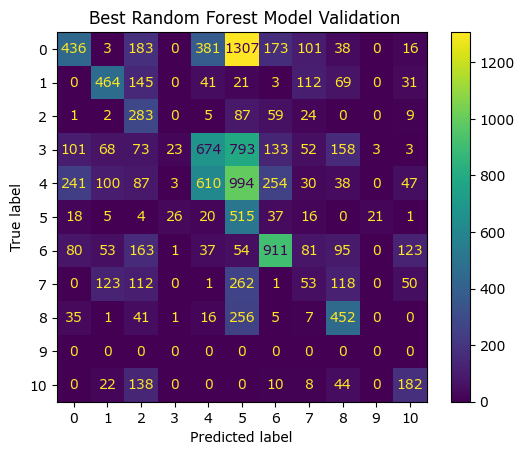

In [16]:
ConfusionMatrixDisplay.from_estimator(best_random_forest, X_valid_scaled, y_valid)
plt.title(' Best Random Forest Model Validation');

As we can see here, both of our models performed pretty poorly, which was on another hand expected since is a very complex data.

Now, we'd do a CNN model with the processed Spectrograms.